# import libraries

In [213]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# import dataset

In [214]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [215]:
# See head of the dataset
dataset.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [216]:
#Check the shape of dataframe
dataset.shape

(506, 14)

In [217]:
#see type of columns
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [218]:
#check for missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [219]:
#see the correlation between the features
corr = dataset.corr()

<AxesSubplot:>

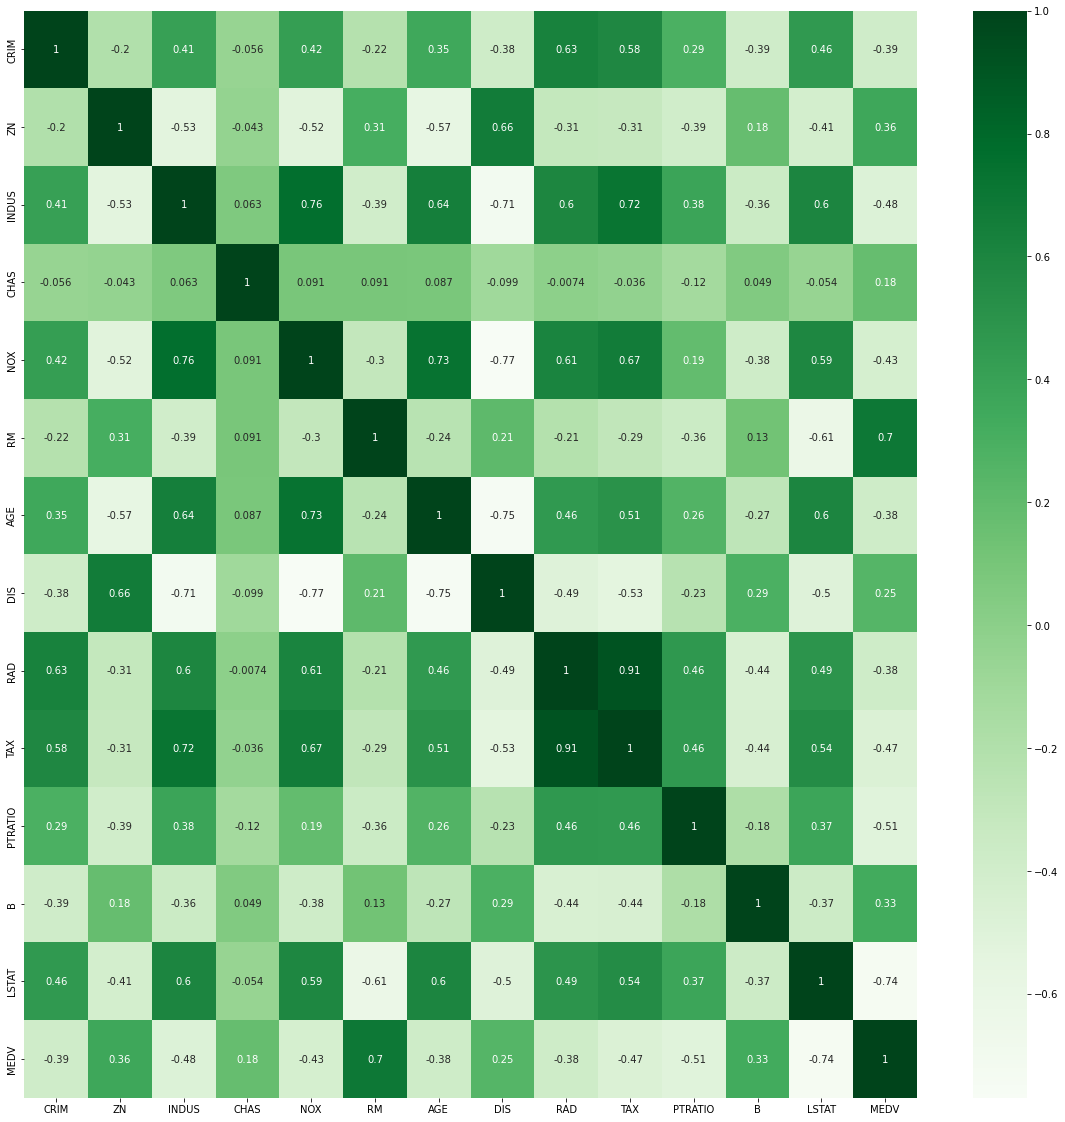

In [220]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap='Greens',annot = True)

# Spliting dataset into training & test set

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Multiple linear regression

In [222]:
from sklearn.linear_model import LinearRegression
mul_reg = LinearRegression()
mul_reg.fit(X_train, y_train)
y_pred = mul_reg.predict(X_test)
print(y_pred)

[32.65503184 28.0934953  18.02901829 21.47671576 18.8254387  19.87997758
 32.42014863 18.06597765 24.42277848 27.00977832 27.04081017 28.75196794
 21.15677699 26.85200196 23.38835945 20.66241266 17.33082198 38.24813601
 30.50550873  8.74436733 20.80203902 16.26328126 25.21805656 24.85175752
 31.384365   10.71311063 13.80434635 16.65930389 36.52625779 14.66750528
 21.12114902 13.95558618 43.16210242 17.97539649 21.80116017 20.58294808
 17.59938821 27.2212319   9.46139365 19.82963781 24.30751863 21.18528812
 29.57235682 16.3431752  19.31483171 14.56343172 39.20885479 18.10887551
 25.91223267 20.33018802 25.16282007 24.42921237 25.07123258 26.6603279
  4.56151258 24.0818735  10.88682673 26.88926656 16.85598381 35.88704363
 19.55733853 27.51928921 16.58436103 18.77551029 11.13872875 32.36392607
 36.72833773 21.95924582 24.57949647 25.14868695 23.42841301  6.90732017
 16.56298149 20.41940517 20.80403418 21.54219598 33.85383463 27.94645899
 25.17281456 34.65883942 18.62487738 23.97375565 34.

In [223]:
print(y_test)

[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6 23.7 31.2 19.3 19.4
 19.4 27.9 13.9 50.  24.1 14.6 16.2 15.6 23.8 25.  23.5  8.3 13.5 17.5
 43.1 11.5 24.1 18.5 50.  12.6 19.8 24.5 14.9 36.2 11.9 19.1 22.6 20.7
 30.1 13.3 14.6  8.4 50.  12.7 25.  18.6 29.8 22.2 28.7 23.8  8.1 22.2
  6.3 22.1 17.5 48.3 16.7 26.6  8.5 14.5 23.7 37.2 41.7 16.5 21.7 22.7
 23.  10.5 21.9 21.  20.4 21.8 50.  22.  23.3 37.3 18.  19.2 34.9 13.4
 22.9 22.5 13.  24.6 18.3 18.1 23.9 50.  13.6 22.9 10.9 18.9 22.4 22.9
 44.8 21.7 10.2 15.4]


In [224]:
# Evaluate Multiple Linear regression with R Squre
from sklearn.metrics import r2_score
lin_r_squre = r2_score(y_test, y_pred)

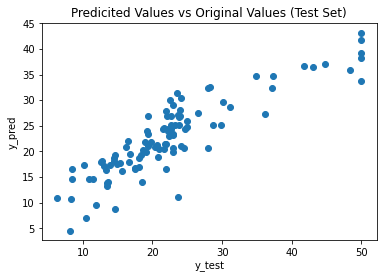

In [225]:
#Predicited Values vs Test Set
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicited Values vs Original Values (Test Set)')
plt.show()

# Feature Scaling Independed variable

In [226]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X_test = StandardScaler()
X_sc = sc_X.fit_transform(X_train)
sc_X_test.fit_transform(X_test)

array([[-0.541515  ,  0.95046258, -1.33166171, ..., -0.05711455,
         0.46657019, -0.67904682],
       [-0.54551801,  1.8887987 , -1.09985593, ..., -0.42995832,
         0.46657019, -0.73042217],
       [-0.5113626 , -0.45704162, -0.64638587, ..., -0.2901419 ,
         0.42049551,  0.97523937],
       ...,
       [-0.53169432, -0.45704162, -0.40733616, ...,  1.10802223,
         0.42880224,  0.12387647],
       [ 1.50236071, -0.45704162,  0.9748058 , ...,  0.78178393,
        -3.65633828,  0.51873271],
       [ 1.12021352, -0.45704162,  0.9748058 , ...,  0.78178393,
         0.35393089,  0.98257871]])

# Feature scaling Depended Variable

In [227]:
from sklearn.preprocessing import StandardScaler

sc_x_train = StandardScaler()
sc_x_test = StandardScaler()

sc_y_train = StandardScaler()
sc_y_test = StandardScaler()

svr_x_train = sc_x_train.fit_transform((X_train))
svr_y_train = sc_y_train.fit_transform((y_train).reshape(-1,1))

svr_x_test = sc_x_test.fit_transform((X_test))
svr_y_test = sc_y_test.fit_transform((y_test).reshape(-1,1))

# Applying Kernel PCA

In [228]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'linear')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Suport vector machine

In [229]:
from sklearn.svm import SVR
svr_reg = SVR(kernel ='rbf')
svr_reg.fit(svr_x_train, svr_y_train)
svr_pred = svr_reg.predict(svr_x_test)

C:\Users\Milad\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [230]:
from sklearn.metrics import r2_score
svr_r_squre = r2_score(svr_pred, svr_y_test)

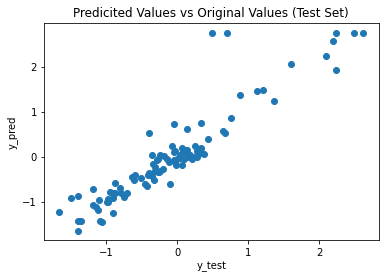

In [231]:
#Predicited Values vs Test Set
plt.scatter(svr_pred,svr_y_test)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicited Values vs Original Values (Test Set)')
plt.show()

# Decision tree regression

In [232]:
from sklearn.tree import DecisionTreeRegressor
tree_regr = DecisionTreeRegressor()
tree_regr.fit(X_train, y_train)
y_tree_pred = tree_regr.predict(X_test)

In [233]:
from sklearn.metrics import r2_score
tree_r_squre = r2_score(y_test, y_tree_pred)

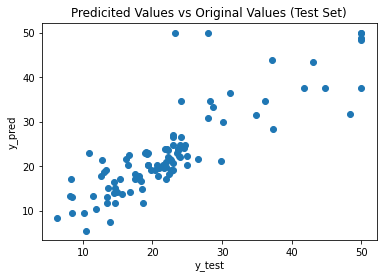

In [234]:
#Predicited Values vs Test Set
plt.scatter(y_test,y_tree_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicited Values vs Original Values (Test Set)')
plt.show()

# Randome forest regresion

In [235]:
from sklearn.ensemble import RandomForestRegressor
rand_for_regr = RandomForestRegressor(n_estimators = 100)
rand_for_regr.fit(X_train, y_train)
random_tree_pred = rand_for_regr.predict(X_test)

In [236]:
from sklearn.metrics import r2_score
randome_forest = r2_score(y_test, random_tree_pred)

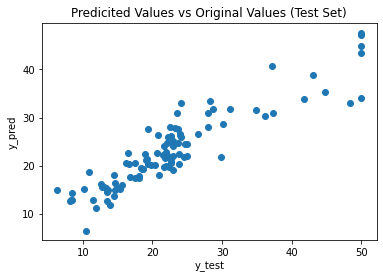

In [237]:
#Predicited Values vs Test Set
plt.scatter(y_test,random_tree_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Predicited Values vs Original Values (Test Set)')
plt.show()

# Evaluation and comparision of all the models

In [238]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines','Desision Tree '],
    'R-squared Score': [lin_r_squre*100, randome_forest*100, svr_r_squre*100, tree_r_squre*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,81.730675
2,Support Vector Machines,79.723564
0,Linear Regression,76.341744
3,Desision Tree,69.177593
